# Лабораторная работа 2
## Решение краевых задач методом разностных аппроксимаций
### Вариант 15

Составить разностностную схему и получить численное решение краевой задачи:
$$
{ay''+(1+bx^2)y=-1}
$$

#### Решение
Разобьем отрезок [*a,b*] на *n* частей с шагом 
$$ h={{b-a}\over{n}} $$
Заменим 
$$ y''\approx{{y_{k+1}-2y_k+y_{k-1}}\over{h^2}} $$
Получим
$$ a{{{y_{k+1}-2y_k+y_{k-1}}\over{h^2}}}+(1+bx^2)y_k=-1 \Rightarrow $$

$$\Rightarrow y_{k-1}a+y_k(-2a+h^2(1+x^2b))+y_{k+1}a=-h^2 $$

Мы получили трехдиагональную систему линейных уравнений

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as pl

n_list = (10, 100, 1000)
k = 15


def yk(x, h, a, b):
    return -2*a+(1+x**2*b)*h**2


def fk(x, h):
    return -h**2


In [2]:
def solve_system(n, a, b):
    h = 2/n
    x = -1 + h
    matrix = np.zeros([n - 1, n - 1])
    vector = np.array([-h**2] * (n-1))

    for i in range(n - 2):
        matrix[i][i+1] = a(x)
        matrix[i][i] = yk(x, h, a(x), b(x))
        x += h
        matrix[i+1][i] = a(x)
    matrix[-1][-1] = yk(x, h, a(x), b(x))
    return [0] + np.linalg.solve(matrix, vector).tolist() + [0]


In [3]:
def show_solutions(a, b):
    for n in n_list:
        y_list = solve_system(n, a, b)
        # print(y_list)
        pl.plot([i*2/n-1 for i in range(n+1)], y_list)
    pl.show()


#### Задание №1
$$ a=b=1 $$

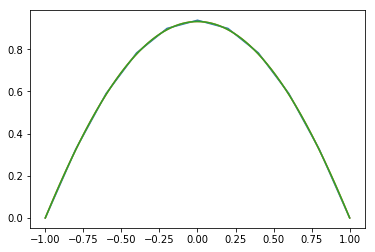

In [4]:
show_solutions(lambda x: 1, lambda x: 1)

#### Задание №2
$$ a= sin(k),\ b=cos(k) $$

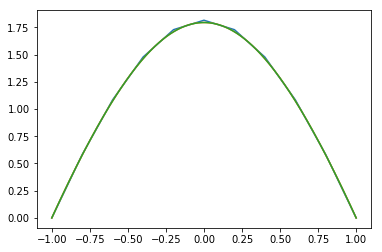

In [5]:
show_solutions(lambda x: sin(k), lambda x: cos(k))

#### Задание №3
$$ a= sin(kx),\ b=cos(kx) $$

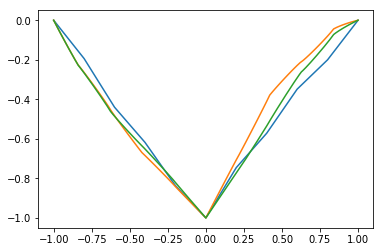

In [6]:
show_solutions(lambda x: sin(k*x), lambda x: cos(k*x))